# Fake News Classifier with TF-IDF Concept

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/train.csv")
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset.shape

(20800, 5)

In [5]:
# drop NA values
dataset = dataset.dropna()
news_dataset = dataset.copy()
news_dataset.reset_index(inplace=True)
news_dataset.shape

(18285, 6)

# Text preprocessing

In [6]:
pip install nltk

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(0, len(news_dataset)):
  review = re.sub('[^a-zA-Z]', ' ', news_dataset['text'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [10]:
corpus[10]

'mystery surrounding third reich nazi germany still subject debate many observer believe nazi germany control adolf hitler possessed supernatural power largely employed pseudo science period however also hold belief mere speculation without proven fact year researcher searched extensively answer mysterious activity associated nazi germany nazi germany invaded russia formerly ussr second world war june time german army progressed deep russian territory gaining ground close capital moscow russian could counter attack eventually driving nazi back nazi occupation russia nazi built secret military base around arctic code named schatzgraber treasure hunter reportedly instrumental war russia base primarily used tactical weather station planning strategic movement nazi troop warship submarine base also housed eminent nazi scientist conducted many experiment help progress german win war widely speculated time nazi used base contact alien extraterrestrial being controversial ahnenerbe even linke

In [11]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [14]:
y = news_dataset['label']
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [16]:
tfidf_v.get_feature_names()[:10]

['aaron',
 'abandon',
 'abandoned',
 'abc',
 'abe',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad']

In [17]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,aaron,abandon,abandoned,abc,abe,abedin,ability,able,abortion,abroad,absence,absolute,absolutely,abu,abuse,academic,academy,accept,acceptable,acceptance,accepted,accepting,access,access pipeline,accident,accompanied,accord,according,according report,account,accountability,accountable,accurate,accusation,accused,accusing,achieve,achieved,achievement,acid,...,wounded,write,writer,writes,writing,written,wrong,wrote,www,xi,yahoo,yard,yeah,year,year ago,year later,year mr,year old,year said,yellow,yemen,yes,yesterday,yet,yet another,yiannopoulos,yield,york,york city,york time,young,young people,younger,youth,youtube,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.052003,0.0,0.000000,0.19322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.055893,0.05765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018692,0.038104,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.266363,0.029658,0.0,0.039668,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080026,0.008586,0.0,0.0,0.010779,0.0,0.0,0.0,0.0,0.0,0.006911,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040242,0.0,0.060127,0.0,0.0,0.0,0.0,0.065391,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28204,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Multinomial Naive Bayes Algo

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [20]:
from sklearn import metrics
import itertools

Accuracy Score:  0.895940347970174
Confusion matrix, without normalization


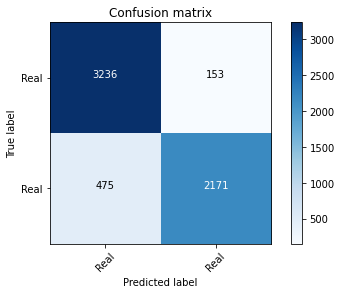

In [21]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score: ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Real'])

# Passive Aggressive Classifier Algorithm

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy Score:  0.9487986743993372
Confusion matrix, without normalization


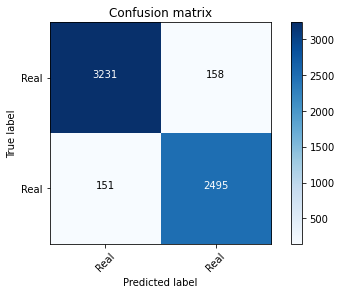

In [23]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score: ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Real'])

# Determine words for Most Real and Fake news

In [24]:
feature_name = tfidf_v.get_feature_names()

In [25]:
classifier.coef_[0]

array([-9.46787192, -9.64373815, -9.37462784, ..., -8.96929675,
       -8.25656552, -8.38450816])

In [26]:
# Most Real
sorted(zip(classifier.coef_[0], feature_name), reverse=True)[:20]

[(-5.369708513911393, 'clinton'),
 (-5.4705621841904435, 'trump'),
 (-5.658235367255738, 'hillary'),
 (-6.024079980325624, 'election'),
 (-6.1031304614803235, 'people'),
 (-6.180104438676107, 'email'),
 (-6.190908221161942, 'state'),
 (-6.192597431192071, 'one'),
 (-6.273663334719471, 'hillary clinton'),
 (-6.2789772333519895, 'fbi'),
 (-6.288537725039104, 'would'),
 (-6.340895781153237, 'american'),
 (-6.363703886879668, 'time'),
 (-6.3666098583751936, 'war'),
 (-6.37521535804616, 'world'),
 (-6.414840854704955, 'year'),
 (-6.427307139321044, 'october'),
 (-6.428268382506039, 'like'),
 (-6.4496381184517615, 'new'),
 (-6.449750723077099, 'said')]

In [28]:
# Most Fake
sorted(zip(classifier.coef_[0], feature_name))[:20]

[(-10.881029397023747, 'briefing posted'),
 (-10.881029397023747, 'devos'),
 (-10.881029397023747, 'gorsuch'),
 (-10.881029397023747, 'judge gorsuch'),
 (-10.881029397023747, 'mr ailes'),
 (-10.881029397023747, 'mr bannon'),
 (-10.881029397023747, 'mr christie'),
 (-10.881029397023747, 'mr cruz'),
 (-10.881029397023747, 'mr kushner'),
 (-10.881029397023747, 'mr sander'),
 (-10.881029397023747, 'mr spicer'),
 (-10.881029397023747, 'mr xi'),
 (-10.881029397023747, 'pruitt'),
 (-10.881029397023747, 'tillerson'),
 (-10.845528346648265, 'spicer'),
 (-10.84536502933999, 'sean spicer'),
 (-10.841827873561318, 'weekday eastern'),
 (-10.841389494499145, 'mr penny'),
 (-10.824631703986375, 'like mr'),
 (-10.824397220683377, 'said mr trump')]

# Prepare submission data for kaggle

In [30]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/test.csv")
test_dataset.fillna('x', inplace=True)

In [31]:
test_corpus = []
for i in range(0, len(test_dataset)):
  review = re.sub('[^a-zA-Z]', ' ', test_dataset['text'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  test_corpus.append(review)

In [32]:
X_submission = tfidf_v.fit_transform(test_corpus).toarray()
X_submission.shape

(5200, 5000)

In [37]:
sub_pred_clf = linear_clf.predict(X_submission)
sub_pred_clf

array([1, 1, 0, ..., 0, 0, 1])

In [38]:
test_dataset['label'] = sub_pred_clf.tolist()

In [39]:
test_dataset = test_dataset[["id", "label"]]

In [40]:
test_dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/submission.csv", index=False)